In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import matplotlib.pyplot as plt
import numpy as np


In [ ]:
import numpy as np
save_path = '/content/drive/MyDrive/just_traj_np/'  # Adjust path as needed

# Save the processed arrays
# train_traj_images=np.load(f'{save_path}train_traj_images.npy')
# train_masked_images= np.load(f'{save_path}train_traj_images.npy')

# train_drone_with_traj_images=np.load(f'{save_path}train_drone_with_traj_images.npy')
train_images=np.load(f'{save_path}train_masked_traj_images.npy')
# train_pointed_images=np.load(f'{save_path}train_pointed_images.npy')

train_observer=np.load(f'{save_path}train_observer_start_end.npy')
train_target=np.load(f'{save_path}train_target_start_end.npy')
train_observer = np.transpose(train_observer, (1, 0, 2))
train_target = np.transpose(train_target, (1, 0, 2))

# train_traj_features=np.load(f'{save_path}train_traj_features.npy' )
i=0
# for image in train_drone_with_traj_images:
#   if i%100==0:
#         plt.imshow(image)  # Replace 0 with the index of the image you want to visualize
#         plt.axis('off')  # Turn off axis labels for better visualization
#         plt.title('Image from train_images')  # Optional title
#         plt.show()
#   i+=1
print(np.shape(train_images))
print(np.shape(train_observer))
print(np.shape(train_target))
# print(np.shape(train_traj_features)


(28, 240, 320, 3)
(28, 2, 3)
(28, 2, 3)


In [ ]:
#print target
print(train_target)

[[[ 5.445e+00  5.000e-03  2.007e+01]
  [ 5.256e+00 -1.200e-02  2.013e+01]]

 [[ 2.952e+00  1.100e-02  1.984e+01]
  [ 3.352e+00 -1.450e-01  1.972e+01]]

 [[ 9.430e+00  9.300e-02  1.998e+01]
  [ 9.475e+00  3.300e-02  2.002e+01]]

 [[ 6.692e+00  6.000e-03  2.006e+01]
  [ 6.380e+00 -1.700e-02  2.011e+01]]

 [[ 5.022e+00  6.300e-02  2.000e+01]
  [ 5.122e+00  3.400e-02  1.998e+01]]

 [[ 7.471e+00 -3.000e-03  2.006e+01]
  [ 7.449e+00 -4.000e-03  2.013e+01]]

 [[ 5.078e+00  1.000e-02  1.998e+01]
  [ 5.000e+00  3.600e-02  1.998e+01]]

 [[ 8.985e+00 -1.700e-02  2.002e+01]
  [ 9.130e+00 -1.100e-02  2.001e+01]]

 [[ 8.562e+00  5.300e-02  1.984e+01]
  [ 8.228e+00 -7.200e-02  1.972e+01]]

 [[ 6.046e+00  1.300e-02  1.995e+01]
  [ 5.991e+00  3.600e-02  1.994e+01]]

 [[ 8.573e+00 -4.200e-02  2.004e+01]
  [ 8.674e+00 -1.170e-01  2.015e+01]]

 [[ 4.466e+00 -6.200e-02  2.006e+01]
  [ 4.510e+00  7.000e-03  2.011e+01]]

 [[ 9.041e+00 -5.300e-02  2.005e+01]
  [ 9.297e+00 -2.300e-02  2.012e+01]]

 [[ 5.156e+0

In [ ]:
unique_features, indices = np.unique(train_traj_features, axis=0, return_index=True)

start_indices = np.sort(indices)

print("Start indices of each unique group:", start_indices)

NameError: name 'train_traj_features' is not defined

In [ ]:
train_traj_observer=[]
train_traj_target=[]

for i in range(len(start_indices)):
    start = start_indices[i]
    end = start_indices[i + 1] if i + 1 < len(start_indices) else len(train_observer)
    print(end)

    train_traj_observer.append((train_observer[start],train_observer[end-1]))
    train_traj_target.append((train_target[start],train_target[end-1]))

train_traj_observer=np.array(train_traj_observer)
train_traj_target=np.array(train_traj_target)

290
590
880
1160
1390
1670
1960
2200
2480
2730
3000


In [ ]:
from matplotlib import pyplot as plt
for i in range(len(start_indices)):
    start = start_indices[i]
    end = start_indices[i + 1] if i + 1 < len(start_indices) else len(train_observer)
    print(end)
    start_image=train_images[start]
    end_image=train_images[end-1]
    plt.imshow(start_image) 
    plt.axis('off') 
    plt.title('Image from train_images')  
    plt.show()
    plt.imshow(end_image)
    plt.axis('off') 
    plt.title('Image from train_images')  
    plt.show()

    print(train_observer[start],train_observer[end-1])
    print(train_target[start],train_target[end-1])

In [ ]:
observer_start=train_observer[:,0]
observer_end=train_observer[:,1]
target_start=train_target[:,0]
target_end=train_target[:,1]

train_relative_start=observer_start-target_start
train_relative_end=observer_end-target_end

In [ ]:
print(train_relative_start)
print(train_relative_end  )

[[-5.403e+00  0.000e+00 -6.400e-02]
 [-2.975e+00  0.000e+00 -2.950e-01]
 [-9.434e+00  0.000e+00  2.400e-02]
 [-6.686e+00  0.000e+00 -5.400e-02]
 [-5.073e+00  0.000e+00 -3.260e-01]
 [-7.475e+00  0.000e+00 -5.700e-02]
 [-4.994e+00  0.000e+00 -3.310e-01]
 [-8.965e+00  0.000e+00 -5.300e-02]
 [-8.646e+00  0.000e+00 -2.810e-01]
 [-5.989e+00  0.000e+00 -3.860e-01]
 [-8.614e+00  0.000e+00 -5.800e-02]
 [-4.537e+00  0.000e+00 -7.100e-02]
 [-9.052e+00  0.000e+00 -6.100e-02]
 [-5.165e+00  0.000e+00 -1.230e-01]
 [-7.998e+00  0.000e+00 -3.700e-02]
 [-6.004e+00  0.000e+00 -3.590e-01]
 [-4.160e+00  0.000e+00 -4.040e-01]
 [-8.269e+00  0.000e+00 -4.700e-02]
 [-7.016e+00  0.000e+00 -6.700e-02]
 [-8.375e+00  0.000e+00 -2.770e-01]
 [-6.417e+00  0.000e+00 -2.830e-01]
 [-7.492e+00  0.000e+00 -2.680e-01]
 [-5.223e+00  0.000e+00 -5.700e-02]
 [-7.338e+00  0.000e+00 -3.000e-01]
 [-6.490e+00  0.000e+00 -2.980e-01]
 [-9.524e+00  0.000e+00  4.000e-03]
 [-6.544e+00  0.000e+00 -5.800e-02]
 [-4.579e+00  0.000e+00 -3.0

In [ ]:
print(np.shape(traj_observer))
print(np.shape(traj_target))

(11, 2, 3)
(11, 2, 3)


In [ ]:
train_box_centers=np.load(f'{save_path}train_box_centers.npy')


In [ ]:

print(np.shape(train_images))
print(np.shape(train_observer))
print(np.shape(train_target))

(3000, 240, 320, 3)
(3000, 240, 320, 3)
(3000, 3)
(3000, 3)


In [ ]:
# val_drone_with_traj_images=np.load(f'{save_path}val_drone_with_traj_images.npy')

val_images=np.load(f'{save_path}val_masked_traj_images.npy')
# val_pointed_images=np.load(f'{save_path}val_pointed_images.npy')

val_observer=np.load(f'{save_path}val_observer_start_end.npy')
val_target=np.load(f'{save_path}val_target_start_end.npy')
val_observer = np.transpose(val_observer, (1, 0, 2))
val_target = np.transpose(val_target, (1, 0, 2))

print(np.shape(val_images))
print(np.shape(val_images))
print(np.shape(val_observer))

(12, 240, 320, 3)
(12, 240, 320, 3)
(12, 2, 3)


In [ ]:
unique_features_val, indices_val = np.unique(val_traj_features, axis=0, return_index=True)

# Sort the indices in ascending order
start_indices_val = np.sort(indices_val)
print(start_indices_val)
# Print the start indices of each unique feature group


[  0 280 580 850]


In [ ]:
val_traj_observer=[]
val_traj_target=[]
for i in range(len(start_indices_val)):
    start = start_indices_val[i]
    end = start_indices_val[i + 1] if i + 1 < len(start_indices_val) else len(val_observer)
    print(end)

    val_traj_observer.append((val_observer[start],val_observer[end-1]))
    val_traj_target.append((val_target[start],val_target[end-1]))

val_traj_observer=np.array(val_traj_observer)
val_traj_target=np.array(val_traj_target)

280
580
850
1140


In [ ]:
observer_start=val_observer[:,0]
observer_end=val_observer[:,1]
target_start=val_target[:,0]
target_end=val_target[:,1]

val_relative_start=observer_start-target_start
val_relative_end=observer_end-target_end

In [ ]:
save_path1 = '/content/drive/MyDrive/just_traj_np_ekleme/'  # Adjust path as needed


train_images_ekleme=np.load(f'{save_path1}train_masked_traj_images.npy')

train_observer_ekleme=np.load(f'{save_path1}train_observer_start_end.npy')
train_target_ekleme=np.load(f'{save_path1}train_target_start_end.npy')
print(np.shape(train_images_ekleme))
print(np.shape(train_observer_ekleme))
print(np.shape(train_target_ekleme))
train_observer_ekleme = np.transpose(train_observer_ekleme, (1, 0, 2))
train_target_ekleme = np.transpose(train_target_ekleme, (1, 0, 2))

# train_traj_features=np.load(f'{save_path}train_traj_features.npy' )
i=0
# for image in train_drone_with_traj_images:
#   if i%100==0:
#         plt.imshow(image)  # Replace 0 with the index of the image you want to visualize
#         plt.axis('off')  # Turn off axis labels for better visualization
#         plt.title('Image from train_images')  # Optional title
#         plt.show()
#   i+=1
print(np.shape(train_images_ekleme))
print(np.shape(train_observer_ekleme))
print(np.shape(train_target_ekleme))

(14, 240, 320, 3)
(2, 14, 3)
(2, 14, 3)
(14, 240, 320, 3)
(14, 2, 3)
(14, 2, 3)


In [ ]:
train_ekleme_relative_start=train_observer_ekleme[:,0]-train_target_ekleme[:,0]
train_ekleme_relative_end=train_observer_ekleme[:,1]-train_target_ekleme[:,1]

In [ ]:
num_to_transfer = 12  # Number of samples to transfer from val to train
indices = np.random.choice(val_images.shape[0], size=num_to_transfer, replace=False)

val_images_subset = val_images[indices]  # Selected data to transfer
val_relative_end_subset = val_relative_end[indices]  # Selected data to transfer
val_relative_start_subset = val_relative_start[indices]  # Selected data to transfer
  # Selected data to transfer
# Step 2: Append the subset to the training data
train_images = np.vstack((train_images, val_images_subset))
train_relative_start = np.vstack((train_relative_start, val_relative_start_subset))
train_relative_end = np.vstack((train_relative_end, val_relative_end_subset))

# Step 3: Remove the transferred data from validation set
val_images= np.delete(val_images, indices, axis=0)
val_relative_start= np.delete(val_relative_start, indices, axis=0)
val_relative_end= np.delete(val_relative_end, indices, axis=0)


In [ ]:

print(np.shape(val_images))
print(np.shape(val_images))
print(np.shape(val_relative_start))

(0, 240, 320, 3)
(0, 240, 320, 3)
(0, 3)


In [ ]:
num_to_transfer = 14 # Number of samples to transfer from val to train
indices = np.random.choice(train_images_ekleme.shape[0], size=num_to_transfer, replace=False)

val_images_subset = train_images_ekleme[indices]  # Selected data to transfer
val_relative_end_subset = train_ekleme_relative_end[indices]  # Selected data to transfer
val_relative_start_subset = train_ekleme_relative_start[indices]  # Selected data to transfer
  # Selected data to transfer
# Step 2: Append the subset to the training data
train_images = np.vstack((train_images, val_images_subset))
train_relative_start = np.vstack((train_relative_start, val_relative_start_subset))
train_relative_end = np.vstack((train_relative_end, val_relative_end_subset))

# Step 3: Remove the transferred data from validation set
train_images_ekleme= np.delete(train_images_ekleme, indices, axis=0)
train_ekleme_relative_end= np.delete(train_ekleme_relative_end, indices, axis=0)
train_ekleme_relative_start= np.delete(train_ekleme_relative_start, indices, axis=0)


In [ ]:
print(np.shape(train_images))
print(np.shape(train_relative_start))
print(np.shape(train_relative_end))
print(np.shape(train_ekleme_relative_end))
print(np.shape(val_relative_start))
print(np.shape(val_relative_end)  )

(54, 240, 320, 3)
(54, 3)
(54, 3)
(0, 3)
(0, 3)
(0, 3)


In [ ]:
print(np.shape(train_images_ekleme))
print(np.shape(train_ekleme_relative_start))
print(np.shape(train_ekleme_relative_end))

(0, 240, 320, 3)
(0, 3)
(0, 3)


In [ ]:
for i in range(len(start_indices_val)):
    start = start_indices_val[i]
    end = start_indices_val[i + 1] if i + 1 < len(start_indices_val) else len(start_indices_val)
    print(end)
    start_image=val_images[start]
    end_image=val_images[end-1]
    plt.imshow(start_image)  
    plt.axis('off')  
    plt.title('Image from train_images')  
    plt.show()
    plt.imshow(end_image)
    plt.axis('off')  
    plt.title('Image from train_images') 
    plt.show()

    print(val_observer[start],val_observer[end-1])
    print(val_target[start],val_target[end-1])

In [ ]:
import numpy as np

dataset = list(zip(train_images, train_relative_start, train_relative_end))

np.random.seed(42)  
np.random.shuffle(dataset)

train_images, train_relative_start, train_relative_end = zip(*dataset)

train_images = np.array(train_images)
train_relative_start = np.array(train_relative_start)
train_relative_end = np.array(train_relative_end)

split_ratio = 0.9
split_index = int(len(train_images) * split_ratio)

train_images_final = train_images[:split_index]
val_images = train_images[split_index:]

train_relative_start_final = train_relative_start[:split_index]
val_relative_start = train_relative_start[split_index:]

train_relative_end_final = train_relative_end[:split_index]
val_relative_end = train_relative_end[split_index:]

print("Train Images:", train_images_final.shape)
print("Validation Images:", val_images.shape)
print("Train Start Coords:", train_relative_start_final.shape)
print("Validation Start Coords:", val_relative_start.shape)
print("Train End Coords:", train_relative_end_final.shape)
print("Validation End Coords:", val_relative_end.shape)

Train Images: (48, 240, 320, 3)
Validation Images: (6, 240, 320, 3)
Train Start Coords: (48, 3)
Validation Start Coords: (6, 3)
Train End Coords: (48, 3)
Validation End Coords: (6, 3)


In [ ]:
save_path = '/content/drive/MyDrive/just_trajectory/'  # Adjust path as needed

# Save the processed arrays
# train_traj_images=np.load(f'{save_path}train_traj_images.npy')
# train_masked_images= np.load(f'{save_path}train_traj_images.npy')

train_masked_traj_images=np.load(f'{save_path}train_masked_traj_images.npy')
val_masked_traj_images=np.load(f'{save_path}val_masked_traj_images.npy')

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models, Input
from tensorflow.keras.applications import MobileNetV2
model=None
def create_mobilenetv2_backbone(input_shape=(240, 320, 3), trainable=False):
    """
    Creates a MobileNetV2 backbone for feature extraction with custom input shape.
    """
    base_model = MobileNetV2(
        include_top=False,
        weights='imagenet',
        input_shape=input_shape
    )
    base_model.trainable = trainable

    x = base_model.output
    x = layers.GlobalAveragePooling2D()(x) 

    backbone = models.Model(inputs=base_model.input, outputs=x,
                            name="MobileNetV2_Backbone")
    return backbone


def create_model_with_init_location(
    img_shape=(240, 320, 3),
    loc_shape=(3,),
    trainable=False
):
   
    image_input = Input(shape=img_shape, name="trajectory_image")
    init_loc_input = Input(shape=loc_shape, name="initial_location")

   
    backbone = create_mobilenetv2_backbone(img_shape, trainable=trainable)
    image_features = backbone(image_input)  # shape (None, 1280)

  
    combined = layers.Concatenate()([image_features, init_loc_input])

  
    x = layers.Dense(128, activation='relu')(combined)
    x = layers.Dropout(0.3)(x)
    x = layers.Dense(32, activation='relu')(x)
    x = layers.Dropout(0.3)(x)

 
    outputs = layers.Dense(3, activation='linear', name="end_location")(x)

  
    model = models.Model(inputs=[image_input, init_loc_input],
                         outputs=outputs,
                         name="DroneLocationModel_MobileNetV2")
    return model



model = create_model_with_init_location((240, 320, 3), (3,), trainable=False)
# model.compile(optimizer='adam', loss='mse', metrics=['mae'])
# model.summary()

# Suppose:
#   X_images -> shape (N, 240, 320, 3)   your masked images
#   X_initloc -> shape (N, 3)           initial (x0, y0, z0)
#   Y_endloc -> shape (N, 3)            final or delta location
# #
# from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
# train_images = preprocess_input(train_images)
# val_images=preprocess_input(val_images)
# early_stopping = tf.keras.callbacks.EarlyStopping(
#     monitor='loss',
#     patience=10,
#     restore_best_weights=True,
#         mode='min',         # because we want to stop when loss stops decreasing

# )

# reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(
#         monitor='loss',
#     factor=0.5,
#     patience=5,
#     min_lr=1e-6
# )
# def distance_loss(y_true, y_pred):
#     """
#     Custom loss function to compute the Euclidean distance
#     between predicted and target positions.

#     Args:
#         y_true: Tensor of true positions, shape (batch_size, 3).
#         y_pred: Tensor of predicted positions, shape (batch_size, 3).

#     Returns:
#         Mean Euclidean distance over the batch.
#     """
#     # Compute the squared differences
#     squared_differences = tf.square(y_pred - y_true)

#     # Sum the squared differences along the last axis (x, y, z)
#     sum_squared_differences = tf.reduce_sum(squared_differences, axis=-1)

#     # Compute the square root to get Euclidean distance
#     distances = tf.sqrt(sum_squared_differences)

#     # Return the mean distance over the batch
#     return tf.reduce_mean(distances)
# model.compile(optimizer='adam', loss=distance_loss, metrics=['mae'])
# train_images = preprocess_input(train_images)
# val_images=preprocess_input(val_images)
# train_pointed_images=preprocess_input(train_pointed_images)
# val_pointed_images=preprocess_input(val_pointed_images)
# model.fit(
# [train_images, train_relative_start],  # Training inputs
# train_relative_end,                            # Training targets
# batch_size=8,
# epochs=25,
# validation_data=(
#     [val_images, val_relative_start],  # Validation inputs
#     val_relative_end                                # Validation targets
# ),
# callbacks=[reduce_lr,early_stopping]
# )

<ipython-input-18-5f506740eeae>:9: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = MobileNetV2(


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [ ]:
%pip install keras-tuner

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 11.1 MB/s eta 0:00:00


In [ ]:
import keras_tuner as kt

def build_tunable_model(hp):
    """
    Builds the model with tunable hyperparameters.
    """

    learning_rate = hp.Float("learning_rate", min_value=1e-4, max_value=1e-2, sampling="log")
    activation_choice = hp.Choice("activation", values=["relu", "tanh", "leaky_relu","elu"])

    units_layer_1 = hp.Int("units_layer_1", min_value=64, max_value=256, step=32)
    units_layer_2 = hp.Int("units_layer_2", min_value=16, max_value=128, step=16)

    dropout_rate = hp.Float("dropout_rate", min_value=0.1, max_value=0.5, step=0.1)


    img_shape = (240, 320, 3)
    loc_shape = (3,)
    image_input = Input(shape=img_shape, name="trajectory_image")
    init_loc_input = Input(shape=loc_shape, name="initial_location")

    backbone = create_mobilenetv2_backbone(img_shape, trainable=False)
    image_features = backbone(image_input)

    combined = layers.Concatenate()([image_features, init_loc_input])

    x = layers.Dense(units_layer_1)(combined)
    if activation_choice == "leaky_relu":
        alpha_value = hp.Float("leaky_alpha", 0.1, 0.3, step=0.1)
        x = layers.LeakyReLU(alpha=alpha_value)(x)
    elif activation_choice == "elu":
        x = layers.ELU()(x)
    else:
        x = layers.Activation(activation_choice)(x)

    x = layers.Dropout(dropout_rate)(x)

    x = layers.Dense(units_layer_2)(x)
    if activation_choice == "leaky_relu":
        alpha_value = hp.Float("leaky_alpha", 0.1, 0.3, step=0.1)
        x = layers.LeakyReLU(alpha=alpha_value)(x)
    elif activation_choice == "elu":
        x = layers.ELU()(x)
    else:
        x = layers.Activation(activation_choice)(x)
    x = layers.Dropout(dropout_rate)(x)

    outputs = layers.Dense(3, activation='linear', name="end_location")(x)

    model = models.Model(inputs=[image_input, init_loc_input], outputs=outputs)
    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
        loss=distance_loss,
        metrics=[mean_euclidean_distance]
    )
    return model


In [ ]:
tuner = kt.Hyperband(
    build_tunable_model,  
    objective="val_loss",  
    max_epochs=30,  
    factor=2,  
    directory="/content/drive/MyDrive/hyper_parameter_just_trajectory",  # Directory to save results
    project_name="drone_location_model_tuning"
)

<ipython-input-8-6061a712d29e>:9: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = MobileNetV2(


In [ ]:
tuner = kt.Hyperband(
    build_tunable_model,  
    objective="val_loss",  
    max_epochs=30,  
    factor=2, 
    directory="/content/drive/MyDrive/hyper_parameter_just_trajectory",  
    project_name="drone_location_model_tuning"
)
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir="logs")

tuner.search(
    [train_images, train_relative_start],  
    train_relative_end,                   
    validation_data=([val_images, val_relative_start], val_relative_end),
    epochs=50,
    batch_size=8,
    callbacks=[early_stopping]
)

Trial 92 Complete [00h 00m 24s]
val_loss: 0.7585562467575073

Best val_loss So Far: 0.22853274643421173
Total elapsed time: 00h 36m 11s


In [ ]:
trials = tuner.oracle.trials

for trial_id, trial in trials.items():
    print(f"Trial ID: {trial_id}")
    print(f"Score: {trial.score}")  
    print("Hyperparameters:")
    for hp_name, hp_value in trial.hyperparameters.values.items():
        print(f"  {hp_name}: {hp_value}")
    print("-" * 50)

Trial ID: 0000
Score: 1.6505600214004517
Hyperparameters:
  learning_rate: 0.0048640356869126
  activation: leaky_relu
  units_layer_1: 96
  units_layer_2: 16
  dropout_rate: 0.1
  tuner/epochs: 2
  tuner/initial_epoch: 0
  tuner/bracket: 4
  tuner/round: 0
  leaky_alpha: 0.1
--------------------------------------------------
Trial ID: 0001
Score: 1.8990116119384766
Hyperparameters:
  learning_rate: 0.008117079378823321
  activation: elu
  units_layer_1: 224
  units_layer_2: 80
  dropout_rate: 0.1
  leaky_alpha: 0.1
  tuner/epochs: 2
  tuner/initial_epoch: 0
  tuner/bracket: 4
  tuner/round: 0
--------------------------------------------------
Trial ID: 0002
Score: 2.882978916168213
Hyperparameters:
  learning_rate: 0.0010733251249694183
  activation: relu
  units_layer_1: 192
  units_layer_2: 16
  dropout_rate: 0.5
  leaky_alpha: 0.1
  tuner/epochs: 2
  tuner/initial_epoch: 0
  tuner/bracket: 4
  tuner/round: 0
--------------------------------------------------
Trial ID: 0003
Score: 3

In [ ]:
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

print(f"Best Learning Rate: {best_hps.get('learning_rate')}")
print(f"Best Units Layer 1: {best_hps.get('units_layer_1')}")
print(f"Best Units Layer 2: {best_hps.get('units_layer_2')}")
print(f"Best Dropout Rate: {best_hps.get('dropout_rate')}")
print(f"Best Activation: {best_hps.get('activation')}")


Best Learning Rate: 0.00019170730143696464
Best Units Layer 1: 224
Best Units Layer 2: 48
Best Dropout Rate: 0.1
Best Activation: tanh


In [ ]:
best_model = tuner.hypermodel.build(best_hps)

history = best_model.fit(
    [train_images, train_relative_start],
    train_relative_end,
    validation_data=([val_images, val_relative_start], val_relative_end),
    epochs=30,
    batch_size=8,
    callbacks=[reduce_lr, early_stopping]
)

<ipython-input-8-6061a712d29e>:9: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = MobileNetV2(


Epoch 1/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 13s 1s/step - loss: 4.5017 - mae: 1.7161 - val_loss: 1.1732 - val_mae: 0.4944 - learning_rate: 8.3956e-04
Epoch 2/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 1.7854 - mae: 0.7937 - val_loss: 0.9315 - val_mae: 0.3416 - learning_rate: 8.3956e-04
Epoch 3/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 1.7424 - mae: 0.7521 - val_loss: 0.9043 - val_mae: 0.4325 - learning_rate: 8.3956e-04
Epoch 4/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 1.9013 - mae: 0.8122 - val_loss: 0.8141 - val_mae: 0.3422 - learning_rate: 8.3956e-04
Epoch 5/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 1.6263 - mae: 0.7086 - val_loss: 0.8944 - val_mae: 0.3830 - learning_rate: 8.3956e-04
Epoch 6/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 1.6586 - mae: 0.7196 - val_loss: 0.9163 - val_mae: 0.3638 - learning_rate: 8.3956e-04
Epoch 7/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 1.6442 - mae: 0.7087 - val_loss: 0.9683 - val_mae: 0.4710 - learning_rate: 8.3956e-04


In [ ]:
best_model.save("/content/drive/MyDrive/hyper_parameter_just_trajectory/best_model.keras")

In [ ]:
from tensorflow.keras.models import load_model
import tensorflow as tf
from tensorflow.keras import layers, models, Input
from tensorflow.keras.applications import MobileNetV2
def distance_loss(y_true, y_pred):
    """
    Custom loss function to compute the Euclidean distance
    between predicted and target positions.

    Args:
        y_true: Tensor of true positions, shape (batch_size, 3).
        y_pred: Tensor of predicted positions, shape (batch_size, 3).

    Returns:
        Mean Euclidean distance over the batch.
    """
    squared_differences = tf.square(y_pred - y_true)

    sum_squared_differences = tf.reduce_sum(squared_differences, axis=-1)

    distances = tf.sqrt(sum_squared_differences)

    return tf.reduce_mean(distances)

# Reload the model with the custom loss function
model = load_model('/content/drive/MyDrive/hyper_parameter_just_trajectory/best_model_data_addition_shuffle.keras', custom_objects={'distance_loss': distance_loss})
model.summary()


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ trajectory_image          │ (None, 240, 320, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ MobileNetV2_Backbone      │ (None, 1280)           │      2,257,984 │ trajectory_image[0][0] │
│ (Functional)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ initial_location          │ (None, 3)              │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate_1             │ (None, 1283)           │              0 │ MobileNetV2_Backbone[… │
│ (Concatenate)             │                        │                │ initial_location[0][0] │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_2 (Dense)           │ (None, 160)            │        205,440 │ concatenate_1[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_2 (Activation) │ (None, 160)            │              0 │ dense_2[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_2 (Dropout)       │ (None, 160)            │              0 │ activation_2[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_3 (Dense)           │ (None, 112)            │         18,032 │ dropout_2[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_3 (Activation) │ (None, 112)            │              0 │ dense_3[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_3 (Dropout)       │ (None, 112)            │              0 │ activation_3[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ end_location (Dense)      │ (None, 3)              │            339 │ dropout_3[0][0]        │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 2,929,419 (11.17 MB)

 Trainable params: 223,811 (874.26 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

 Optimizer params: 447,624 (1.71 MB)

In [ ]:
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
train_images_final = preprocess_input(train_images_final)
val_images=preprocess_input(val_images)

In [ ]:
all_train_coords = np.vstack([train_relative_start_final, train_relative_end_final])

coord_mean = np.mean(all_train_coords, axis=0)
coord_std = np.std(all_train_coords, axis=0)

coord_std[coord_std < 1e-8] = 1e-8

In [ ]:
print(train_relative_start_final)
print(train_relative_end_final)

[[-8.375e+00  0.000e+00 -2.770e-01]
 [-9.721e+00  0.000e+00  5.400e-02]
 [-7.261e+00  0.000e+00  3.200e-02]
 [-9.052e+00  0.000e+00 -6.100e-02]
 [-9.518e+00  0.000e+00  4.000e-02]
 [-7.475e+00  0.000e+00 -5.700e-02]
 [-8.269e+00  0.000e+00 -4.700e-02]
 [-8.962e+00  0.000e+00  3.100e-02]
 [-6.686e+00  0.000e+00 -5.400e-02]
 [-4.801e+00  0.000e+00 -3.070e-01]
 [-5.165e+00  0.000e+00 -1.230e-01]
 [-8.646e+00  0.000e+00 -2.810e-01]
 [-6.544e+00  0.000e+00 -5.800e-02]
 [-4.994e+00  0.000e+00 -3.310e-01]
 [-7.065e+00  0.000e+00 -2.960e-01]
 [-5.073e+00  0.000e+00 -3.260e-01]
 [-3.959e+00  0.000e+00 -5.400e-02]
 [-6.490e+00  0.000e+00 -2.980e-01]
 [-6.375e+00  0.000e+00  0.000e+00]
 [-6.998e+00  0.000e+00 -2.800e-02]
 [-9.267e+00  0.000e+00  7.000e-02]
 [-6.004e+00  0.000e+00 -3.590e-01]
 [-5.989e+00  0.000e+00 -3.860e-01]
 [-4.160e+00  0.000e+00 -4.040e-01]
 [-5.937e+00  0.000e+00 -3.120e-01]
 [-7.538e+00  0.000e+00 -5.200e-02]
 [-9.524e+00  0.000e+00  4.000e-03]
 [-4.537e+00  0.000e+00 -7.1

In [ ]:
model.compile(
    optimizer='adam',
    loss=distance_loss,   
    metrics=[mean_euclidean_distance]
)
model.summary()

Model: "DroneLocationModel_MobileNetV2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ trajectory_image          │ (None, 240, 320, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ MobileNetV2_Backbone      │ (None, 1280)           │      2,257,984 │ trajectory_image[0][0] │
│ (Functional)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ initial_location          │ (None, 3)              │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate_1             │ (None, 1283)           │              0 │ MobileNetV2_Backbone[… │
│ (Concatenate)             │                        │                │ initial_location[0][0] │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_2 (Dense)           │ (None, 128)            │        164,352 │ concatenate_1[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_2 (Dropout)       │ (None, 128)            │              0 │ dense_2[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_3 (Dense)           │ (None, 32)             │          4,128 │ dropout_2[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_3 (Dropout)       │ (None, 32)             │              0 │ dense_3[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ end_location (Dense)      │ (None, 3)              │             99 │ dropout_3[0][0]        │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 2,426,563 (9.26 MB)

 Trainable params: 168,579 (658.51 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [ ]:
model.save("/content/drive/MyDrive/hyper_parameter_just_trajectory/best_model_data_addition_shuffle.keras")

In [ ]:
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

print(f"Best Learning Rate: {best_hps.get('learning_rate')}")
print(f"Best Units Layer 1: {best_hps.get('units_layer_1')}")
print(f"Best Units Layer 2: {best_hps.get('units_layer_2')}")
print(f"Best Dropout Rate: {best_hps.get('dropout_rate')}")
print(f"Best Activation: {best_hps.get('activation')}")

Best Learning Rate: 0.00019170730143696464
Best Units Layer 1: 224
Best Units Layer 2: 48
Best Dropout Rate: 0.1
Best Activation: tanh


In [ ]:
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

# Modify a specific parameter
parameter_to_modify = "dropout_rate"  # Example parameter name
new_value = 0.2 # New value for the parameter
best_hps.values[parameter_to_modify] = new_value


In [ ]:
print(f"Best Learning Rate: {best_hps.get('learning_rate')}")
print(f"Best Units Layer 1: {best_hps.get('units_layer_1')}")
print(f"Best Units Layer 2: {best_hps.get('units_layer_2')}")
print(f"Best Dropout Rate: {best_hps.get('dropout_rate')}")
print(f"Best Activation: {best_hps.get('activation')}")

Best Learning Rate: 0.00019170730143696464
Best Units Layer 1: 224
Best Units Layer 2: 48
Best Dropout Rate: 0.2
Best Activation: tanh


In [ ]:
trials = tuner.oracle.trials

# Iterate over the trials to extract information
for trial_id, trial in trials.items():
    print(f"Trial ID: {trial_id}")
    print(f"Score: {trial.score}")  # Best metric for the trial
    print("Hyperparameters:")
    for hp_name, hp_value in trial.hyperparameters.values.items():
        print(f"  {hp_name}: {hp_value}")
    print("-" * 50)

Trial ID: 0002
Score: 1.699338436126709
Hyperparameters:
  learning_rate: 0.004691670147186657
  activation: leaky_relu
  units_layer_1: 192
  units_layer_2: 96
  dropout_rate: 0.1
  tuner/epochs: 2
  tuner/initial_epoch: 0
  tuner/bracket: 4
  tuner/round: 0
  leaky_alpha: 0.1
--------------------------------------------------
Trial ID: 0009
Score: 1.6324437856674194
Hyperparameters:
  learning_rate: 0.00023260914877975476
  activation: relu
  units_layer_1: 128
  units_layer_2: 112
  dropout_rate: 0.4
  leaky_alpha: 0.1
  tuner/epochs: 2
  tuner/initial_epoch: 0
  tuner/bracket: 4
  tuner/round: 0
--------------------------------------------------
Trial ID: 0000
Score: 1.232690453529358
Hyperparameters:
  learning_rate: 0.0003838912108737987
  activation: relu
  units_layer_1: 96
  units_layer_2: 128
  dropout_rate: 0.5
  tuner/epochs: 2
  tuner/initial_epoch: 0
  tuner/bracket: 4
  tuner/round: 0
--------------------------------------------------
Trial ID: 0001
Score: 1.224875330924

In [ ]:
sorted_trials = sorted(
    tuner.oracle.trials.items(),
    key=lambda x: x[1].score,  # Sort by the score
    reverse=False  # Higher scores come first
)

# Display the top 10 models
print("Top 10 Best Models:")
for i, (trial_id, trial) in enumerate(sorted_trials[:10]):
    print(f"Rank {i+1}")
    print(f"  Trial ID: {trial_id}")
    print(f"  Score: {trial.score}")
    print("  Hyperparameters:")
    for hp_name, hp_value in trial.hyperparameters.values.items():
        print(f"    {hp_name}: {hp_value}")
    print("-" * 50)

Top 10 Best Models:
Rank 1
  Trial ID: 0076
  Score: 0.35308733582496643
  Hyperparameters:
    learning_rate: 0.00019170730143696464
    activation: tanh
    units_layer_1: 224
    units_layer_2: 48
    dropout_rate: 0.1
    leaky_alpha: 0.1
    tuner/epochs: 30
    tuner/initial_epoch: 15
    tuner/bracket: 2
    tuner/round: 2
    tuner/trial_id: 0074
--------------------------------------------------
Rank 2
  Trial ID: 0083
  Score: 0.3532681167125702
  Hyperparameters:
    learning_rate: 0.00024454459675378996
    activation: elu
    units_layer_1: 256
    units_layer_2: 64
    dropout_rate: 0.1
    leaky_alpha: 0.1
    tuner/epochs: 30
    tuner/initial_epoch: 15
    tuner/bracket: 1
    tuner/round: 1
    tuner/trial_id: 0081
--------------------------------------------------
Rank 3
  Trial ID: 0075
  Score: 0.36776795983314514
  Hyperparameters:
    learning_rate: 0.00023696753004764242
    activation: elu
    units_layer_1: 256
    units_layer_2: 16
    dropout_rate: 0.1
    l

In [ ]:
best_model = tuner.hypermodel.build(best_hps)


<ipython-input-88-1aaf1ecfc2d9>:9: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = MobileNetV2(


In [ ]:

best_model.summary()

Model: "functional_145"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ trajectory_image          │ (None, 240, 320, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ MobileNetV2_Backbone      │ (None, 1280)           │      2,257,984 │ trajectory_image[0][0] │
│ (Functional)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ initial_location          │ (None, 3)              │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate_147           │ (None, 1283)           │              0 │ MobileNetV2_Backbone[… │
│ (Concatenate)             │                        │                │ initial_location[0][0] │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_294 (Dense)         │ (None, 224)            │        287,616 │ concatenate_147[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_104            │ (None, 224)            │              0 │ dense_294[0][0]        │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_294 (Dropout)     │ (None, 224)            │              0 │ activation_104[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_295 (Dense)         │ (None, 48)             │         10,800 │ dropout_294[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_105            │ (None, 48)             │              0 │ dense_295[0][0]        │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_295 (Dropout)     │ (None, 48)             │              0 │ activation_105[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ end_location (Dense)      │ (None, 3)              │            147 │ dropout_295[0][0]      │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 2,556,547 (9.75 MB)

 Trainable params: 298,563 (1.14 MB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [ ]:
try:
    best_model.save("/content/drive/MyDrive/hyper_parameter/best_model.keras")
    print("Model saved successfully.")
except Exception as e:
    print(f"Error while saving the model: {e}")

Model saved successfully.


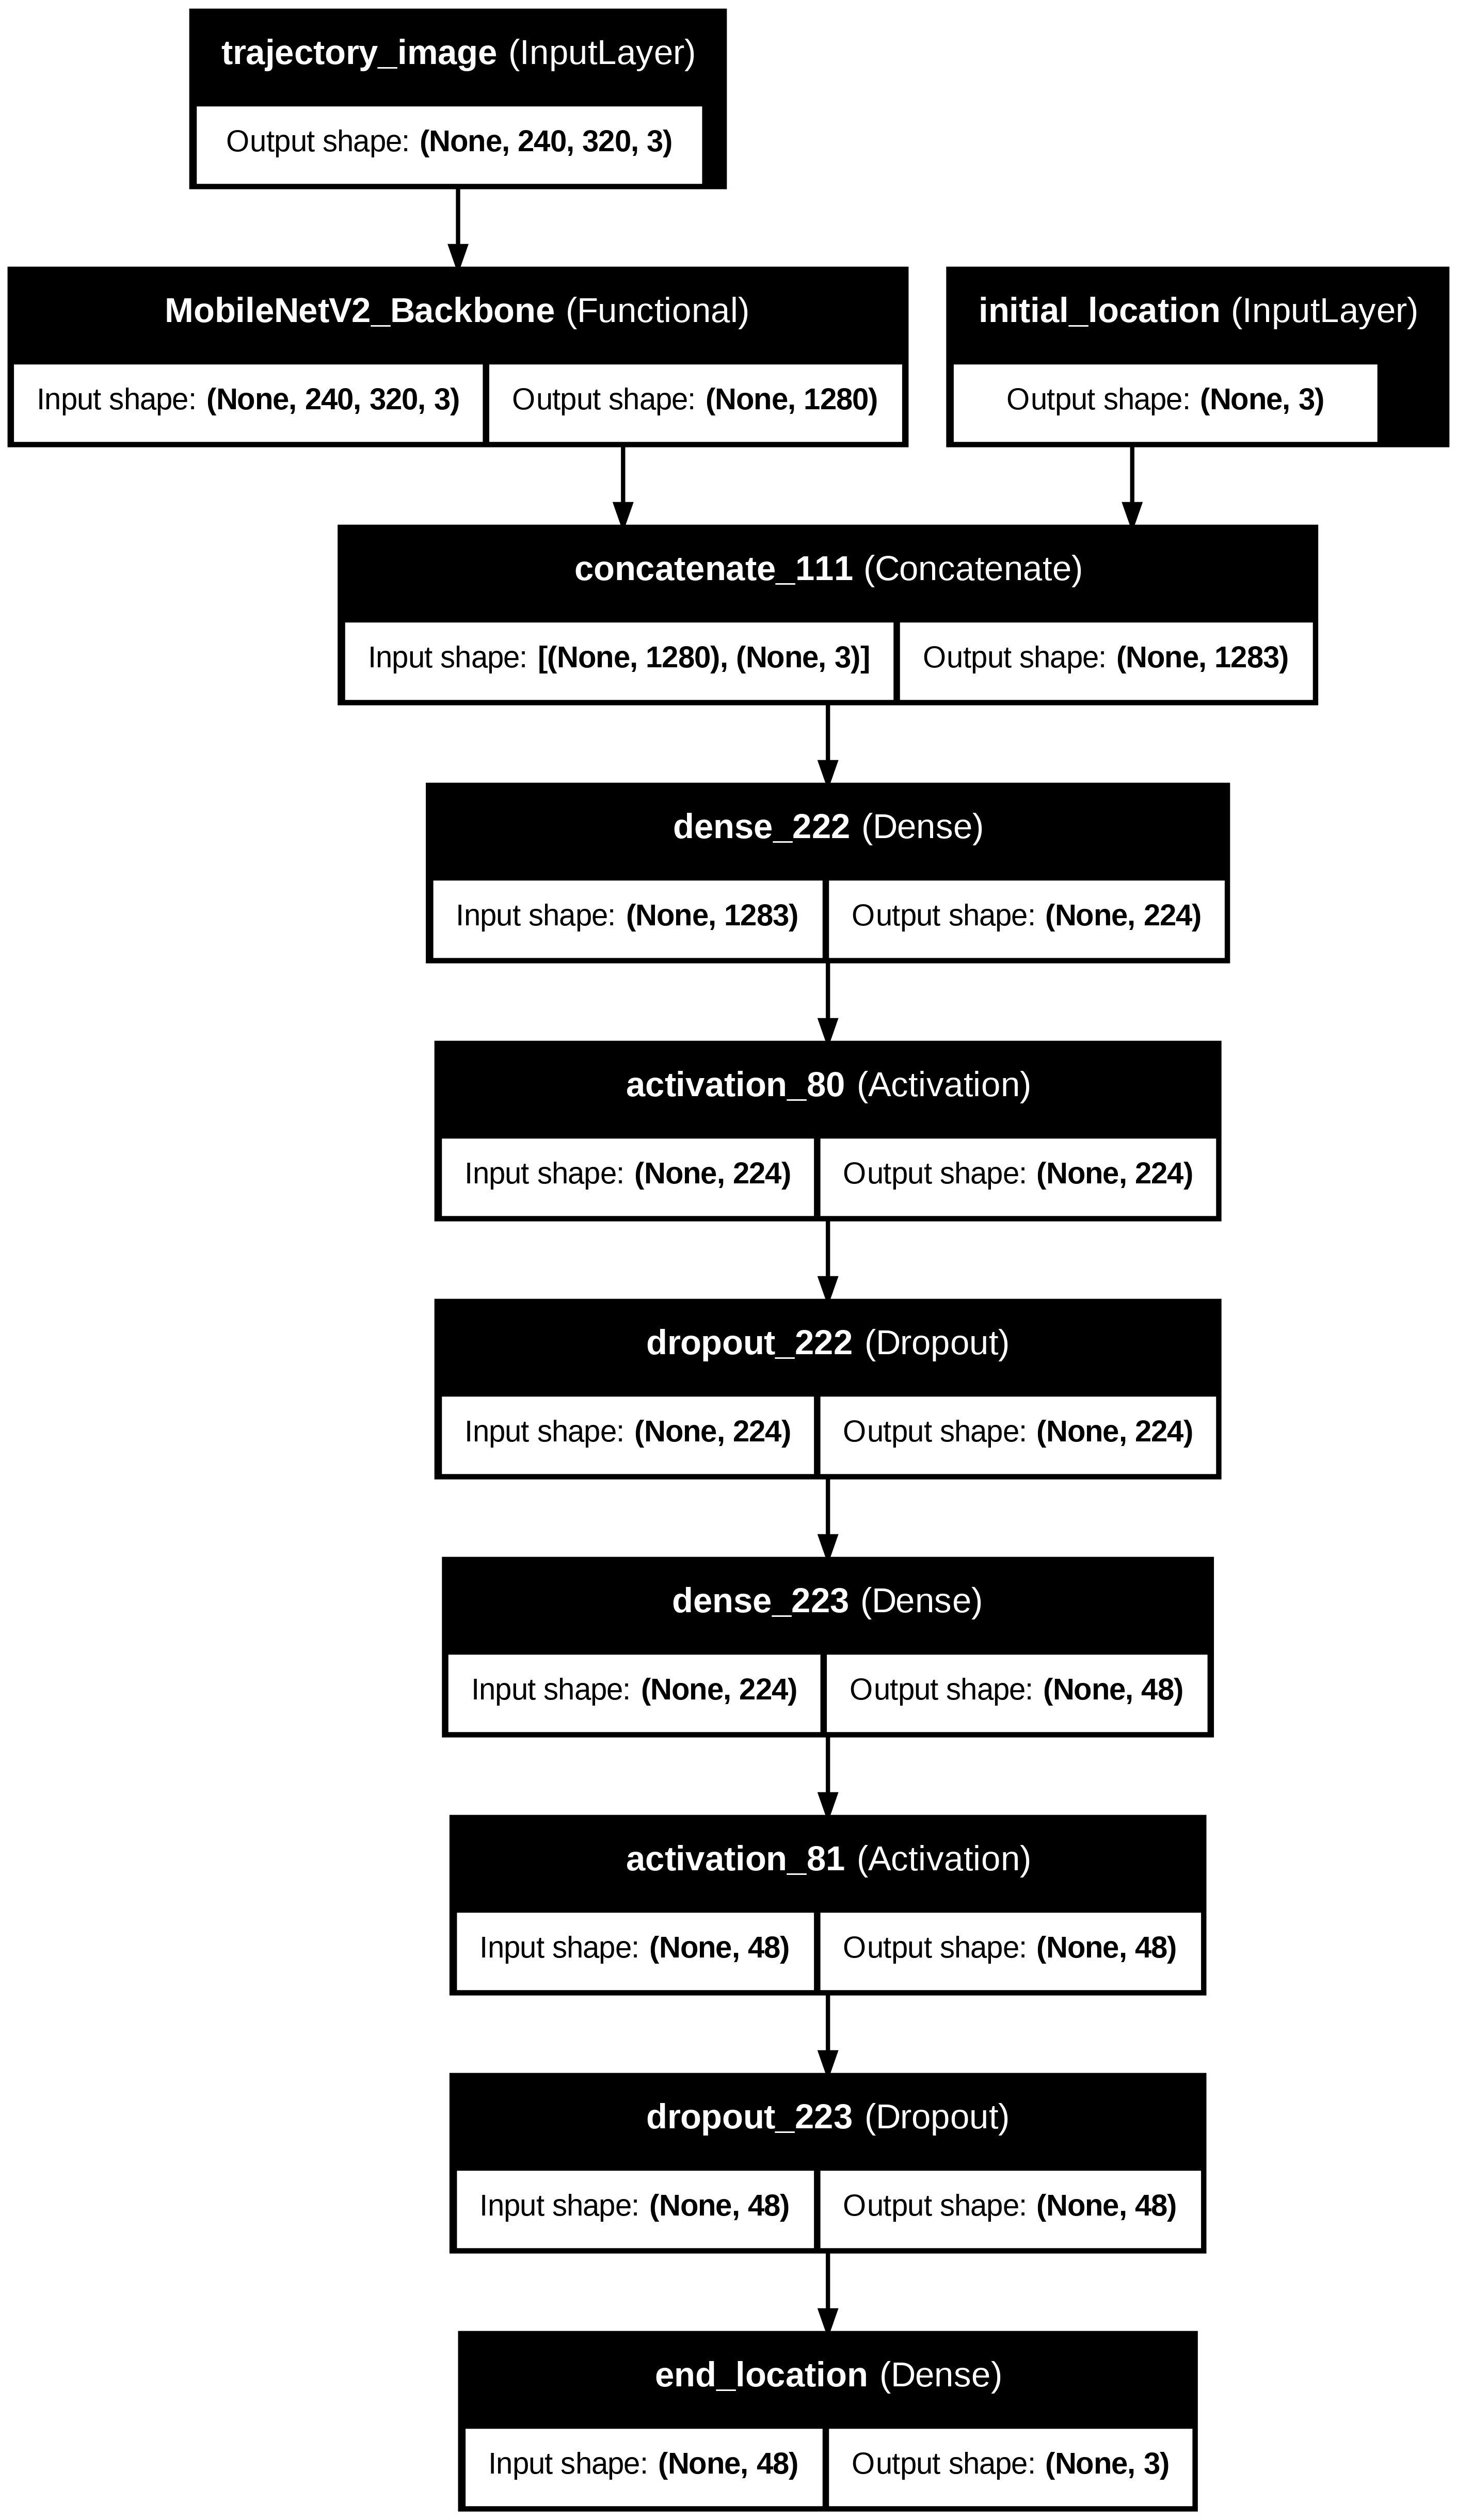

In [ ]:
from tensorflow.keras.utils import plot_model

# Save the model architecture to a file
plot_model(model, to_file='/content/sample_data/model_architecture.png', show_shapes=True, show_layer_names=True, dpi=300)

In [ ]:
sorted_trials = sorted(
    tuner.oracle.trials.items(),
    key=lambda x: x[1].score,  # Sort by score
    reverse=False  # Higher scores first
)

# Get the second-best trial
second_best_trial = sorted_trials[1]  # Index 1 gives the second-best

# Extract hyperparameters of the second-best model
second_best_hps = second_best_trial[1].hyperparameters

# Build the second-best model
second_best_model = tuner.hypermodel.build(second_best_hps)


<ipython-input-88-1aaf1ecfc2d9>:9: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = MobileNetV2(


In [ ]:
try:
    second_best_model.save("/content/drive/MyDrive/hyper_parameter/second_best_model.keras")
    print("Model saved successfully.")
except Exception as e:
    print(f"Error while saving the model: {e}")

Model saved successfully.


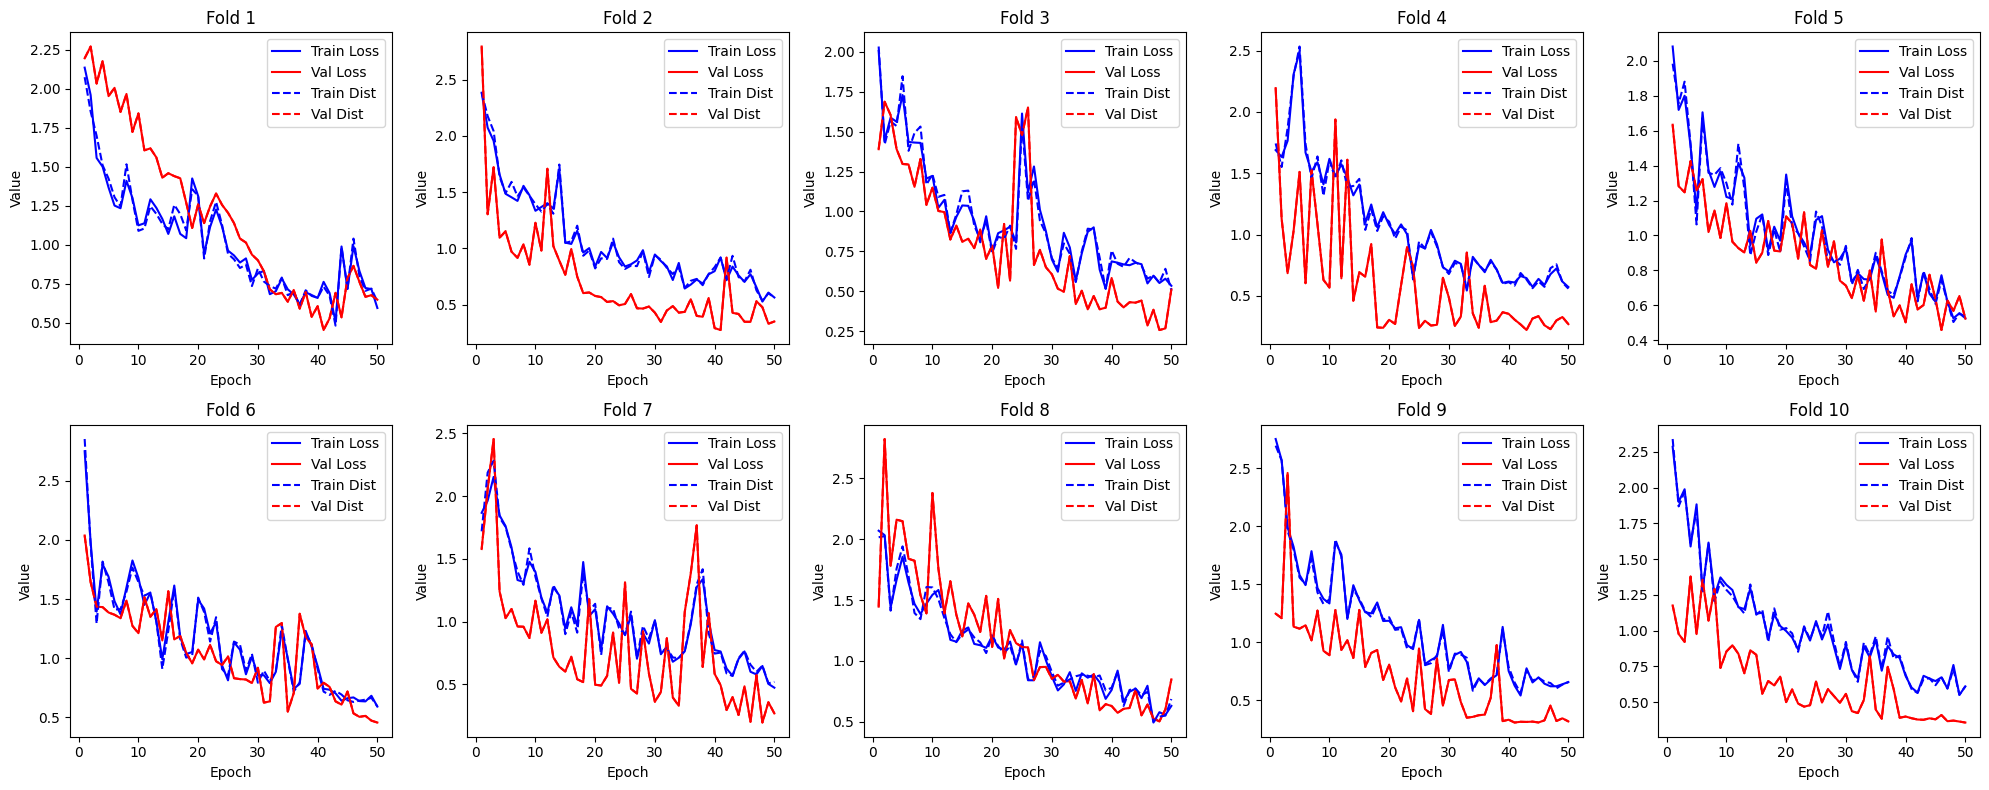

In [ ]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(20, 8))

for i, history in enumerate(second_best_histories):
    # Determine subplot row, col for fold i
    row = i // 5
    col = i % 5

    ax = axes[row, col]

    # Retrieve metrics for this fold from the History object
    train_loss = history.history['loss']
    val_loss   = history.history['val_loss']

    train_dist = history.history['mean_euclidean_distance']
    val_dist   = history.history['val_mean_euclidean_distance']

    epochs = range(1, len(train_loss) + 1)

    # Plot all 4 curves in this single subplot
    ax.plot(epochs, train_loss, 'b-',  label='Train Loss')
    ax.plot(epochs, val_loss,   'r-',  label='Val Loss')
    ax.plot(epochs, train_dist, 'b--', label='Train Dist')
    ax.plot(epochs, val_dist,   'r--', label='Val Dist')

    ax.set_title(f'Fold {i+1}')
    ax.set_xlabel('Epoch')
    ax.set_ylabel('Value')

    # Optionally show legend only for the first subplot or for each subplot
    # Here we show for each subplot to identify lines easily
    ax.legend()

plt.tight_layout()
plt.show()
